# Clustering - Exploratory Analysis

Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.

-- Prasad Patil, Novice Data Science Storyteller, Mar 23

## Learning Goals

Can we see patterns, find signals in the data?

What features are driving the outcome?

Are there other features we can construct that have stronger relationships?

Use Visualization and statistical testing to help answer these questions.

We want to walk away from exploration with with modeling strategies (feature selection, algorithm selection, evaluation methods, for example).

In [1]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Wrangling
import pandas as pd
import numpy as np
import wrangle_zillow as wz
from sklearn.model_selection import train_test_split

# Statistical Tests
import scipy.stats as stats

# Visualizing
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from sklearn.model_selection import learning_curve

pd.options.display.float_format = '{:20,.2f}'.format

Sourcing the Zillow database as the data source, create a jupyter notebook named explore_zillow and do the following:


Ask at least 5 questions about the data, keeping in mind that your target variable is logerror. e.g. Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?

Answer those questions through a mix of statistical tests and visualizations.

In [2]:
df = wz.wrangle_zillow()
df.head()

,id,parcelid,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,latitude,...,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,id,parcelid,logerror,transactiondate
336,337,17051828,4.00,4.00,4.00,"4,969.00","4,969.00","6,111.00",4.00,"34,433,200.00",...,"779,712.00","2,228,473.00","2,016.00","1,448,761.00","24,556.86","61,110,010,011,023.00",337,14688177,0.01,2017-01-03
337,338,17052152,2.00,3.00,2.00,"1,800.00","1,800.00","6,111.00",2.00,"34,464,778.00",...,"319,803.00","794,940.00","2,016.00","475,137.00","8,571.20","61,110,009,032,019.00",338,10930942,0.05,2017-01-03
338,339,17052992,1.00,2.00,1.00,780.00,780.00,"6,111.00",1.00,"34,450,686.00",...,"70,231.00","88,731.00","2,016.00","18,500.00","1,652.36","61,110,010,024,015.00",339,17246711,0.01,2017-01-03
339,340,17053038,2.00,2.00,2.00,"1,250.00","1,250.00","6,111.00",2.00,"34,448,639.00",...,"79,575.00","233,424.00","2,016.00","153,849.00","3,191.16","61,110,010,023,002.00",340,12559816,0.06,2017-01-03
340,341,17053061,1.00,2.00,1.00,"1,404.00","1,404.00","6,111.00",1.00,"34,450,089.00",...,"99,853.00","313,844.00","2,016.00","213,991.00","3,987.00","61,110,010,024,021.00",341,14673239,0.01,2017-01-03


In [3]:
def label_fips(x):
    if x['fips'] == 6037:
        return 'los angeles county'
    if x['fips'] == 6059:
        return 'orange county'
    if x['fips'] == 6111:
        return 'ventura county'

In [4]:
df['fips'] = df.apply(lambda x: label_fips(x), axis=1)

In [5]:
df.head()

,id,parcelid,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,latitude,...,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,id,parcelid,logerror,transactiondate
336,337,17051828,4.00,4.00,4.00,"4,969.00","4,969.00",ventura county,4.00,"34,433,200.00",...,"779,712.00","2,228,473.00","2,016.00","1,448,761.00","24,556.86","61,110,010,011,023.00",337,14688177,0.01,2017-01-03
337,338,17052152,2.00,3.00,2.00,"1,800.00","1,800.00",ventura county,2.00,"34,464,778.00",...,"319,803.00","794,940.00","2,016.00","475,137.00","8,571.20","61,110,009,032,019.00",338,10930942,0.05,2017-01-03
338,339,17052992,1.00,2.00,1.00,780.00,780.00,ventura county,1.00,"34,450,686.00",...,"70,231.00","88,731.00","2,016.00","18,500.00","1,652.36","61,110,010,024,015.00",339,17246711,0.01,2017-01-03
339,340,17053038,2.00,2.00,2.00,"1,250.00","1,250.00",ventura county,2.00,"34,448,639.00",...,"79,575.00","233,424.00","2,016.00","153,849.00","3,191.16","61,110,010,023,002.00",340,12559816,0.06,2017-01-03
340,341,17053061,1.00,2.00,1.00,"1,404.00","1,404.00",ventura county,1.00,"34,450,089.00",...,"99,853.00","313,844.00","2,016.00","213,991.00","3,987.00","61,110,010,024,021.00",341,14673239,0.01,2017-01-03


What are the distributions for the variables?

Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?

Is there a relationship between log error and tax amount?

Is there a relationship between log error and bedroomcnt?

If we control for taxvaluedollarcnt (by 10,000s), does log error differ across bathroomcnt?

In [6]:
df.columns.to_list()

['id',
 'parcelid',
 'bathroomcnt',
 'bedroomcnt',
 'calculatedbathnbr',
 'calculatedfinishedsquarefeet',
 'finishedsquarefeet12',
 'fips',
 'fullbathcnt',
 'latitude',
 'longitude',
 'lotsizesquarefeet',
 'propertycountylandusecode',
 'propertylandusetypeid',
 'rawcensustractandblock',
 'regionidcity',
 'regionidcounty',
 'regionidzip',
 'roomcnt',
 'yearbuilt',
 'structuretaxvaluedollarcnt',
 'taxvaluedollarcnt',
 'assessmentyear',
 'landtaxvaluedollarcnt',
 'taxamount',
 'censustractandblock',
 'id',
 'parcelid',
 'logerror',
 'transactiondate']

In [7]:
drop_cols = ['id', 
             'parcelid', 
             'fips', 
             'propertycountylandusecode', 
             'propertylandusetypeid', 
             'rawcensustractandblock', 
             'regionidcity', 
             'regionidcounty', 
             'regionidcounty',
             'regionidzip']

<Figure size 1600x900 with 0 Axes>

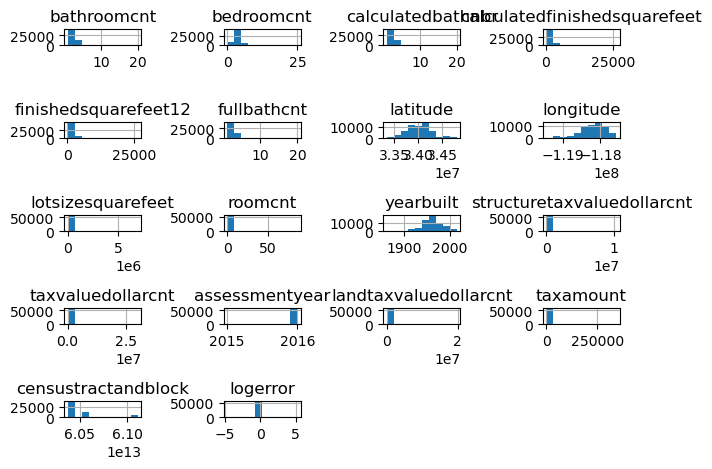

In [8]:
# What are the distributions for the variables?
plt.figure(figsize=(16,9))
df.drop(columns=drop_cols).hist()
plt.tight_layout()

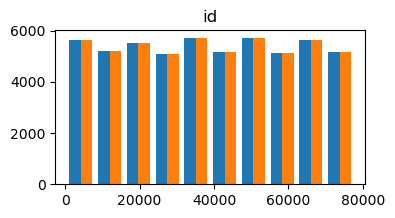

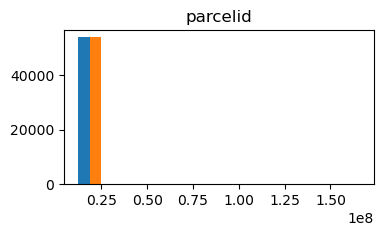

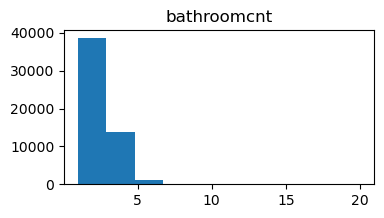

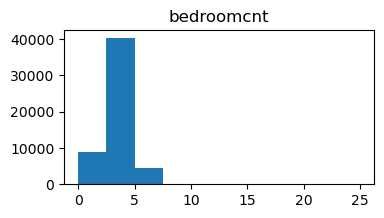

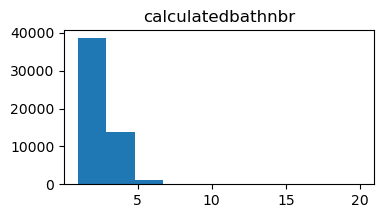

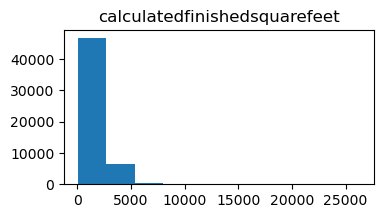

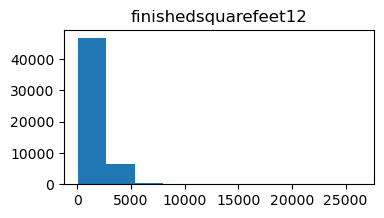

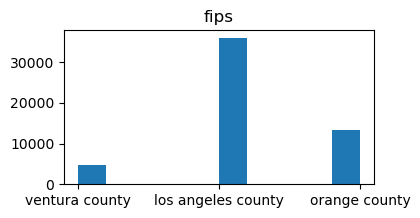

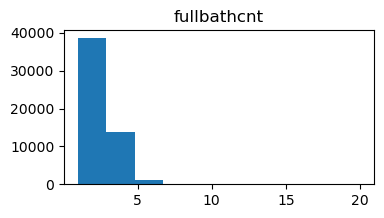

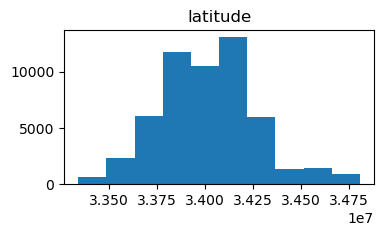

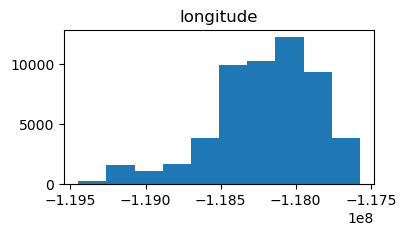

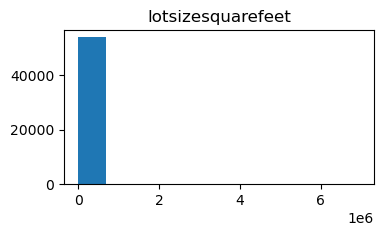

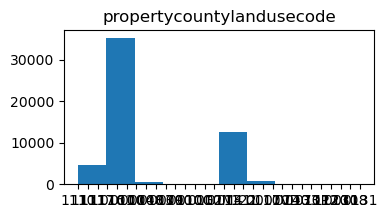

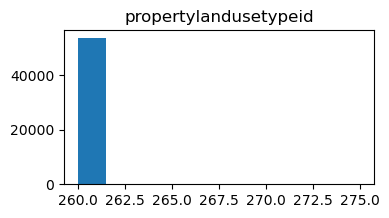

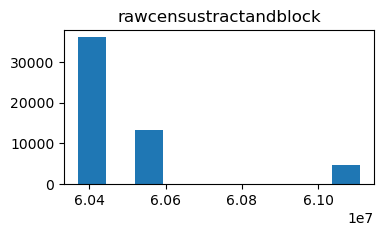

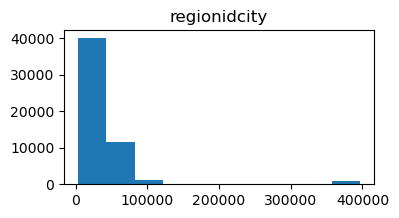

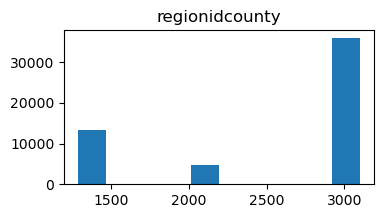

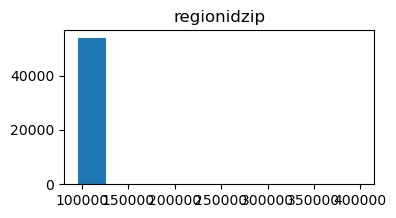

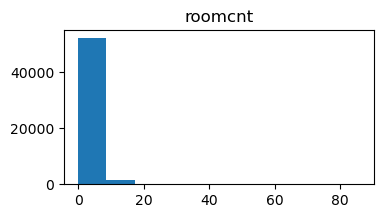

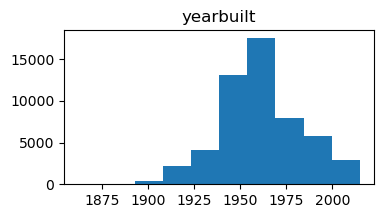

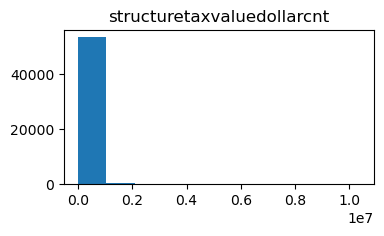

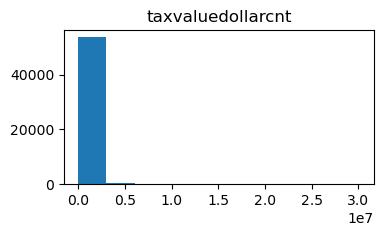

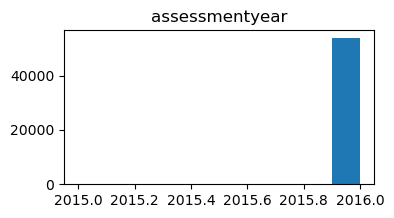

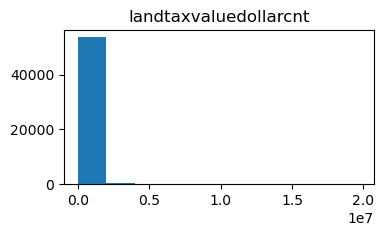

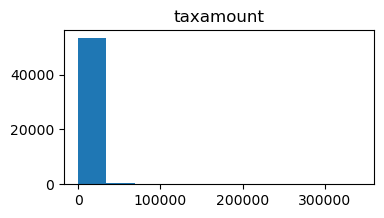

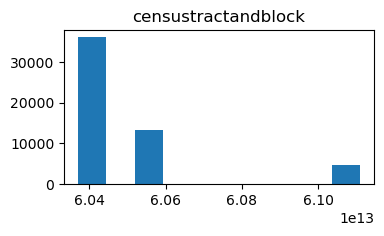

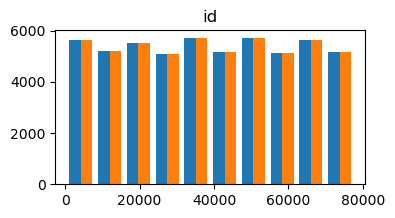

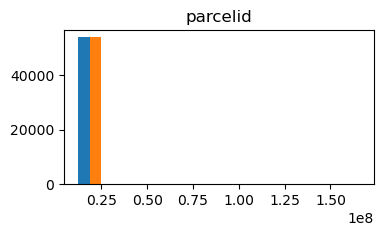

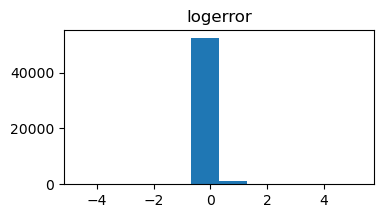

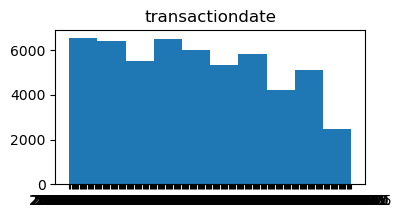

In [59]:
for col in df.columns:
    plt.figure(figsize=(4,2))
    plt.hist(df[col])
    plt.title(col)
    plt.show()

Is logerror significantly different for properties in
 LA County vs Orange County vs Ventura County?


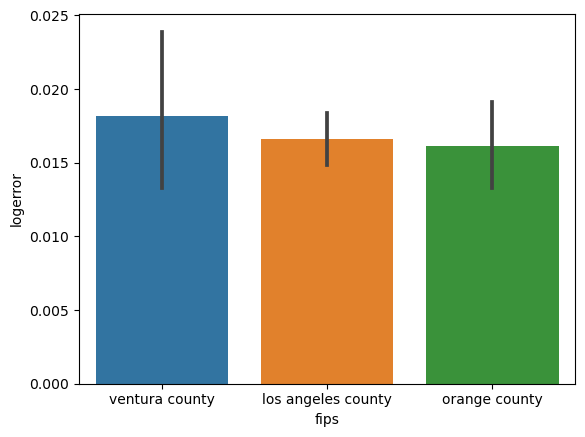

In [87]:
print('Is logerror significantly different for properties in\n LA County vs Orange County vs Ventura County?')
sns.barplot(x=df.fips, y=df.logerror)
plt.show()

In [12]:
la_county = df[df.fips == 'los angeles county'].logerror
orange = df[df.fips == 'orange county'].logerror
ventura = df[df.fips == 'ventura county'].logerror

In [14]:
print(la_county.var())
print(orange.var())
print(ventura.var())

0.028992834547926484
0.028643643092232083
0.03397405141077895


### ANOVA 

Compare means of groups a, b & c.

In [15]:
f, p = stats.f_oneway(la_county, ventura, orange)
f, p

(0.25297889854768385, 0.7764851874975836)

H$_0$ = the mean logerror does not differ between orange county, la county, and ventura in the population 

µ1 = µ2 = µ3

H$_a$ = the mean logerror of orange county, la county, and ventura are not all equal in the population.

In [88]:
null_1 = 'the mean logerror does not significantly differ between\n orange county, la county, and ventura in the population.'
alpha = 0.05

if p < alpha:
    print("We reject that", null_1)
else:
    print("We fail to reject that", null_1)

We fail to reject that the mean logerror does not significantly differ between
 orange county, la county, and ventura in the population.


### Takeaway

The mean logerror for fips/counties are relatively close to equal.

Can test further with two-sample t-test for each county combination.

Is there a relationship between logerror and tax amount?


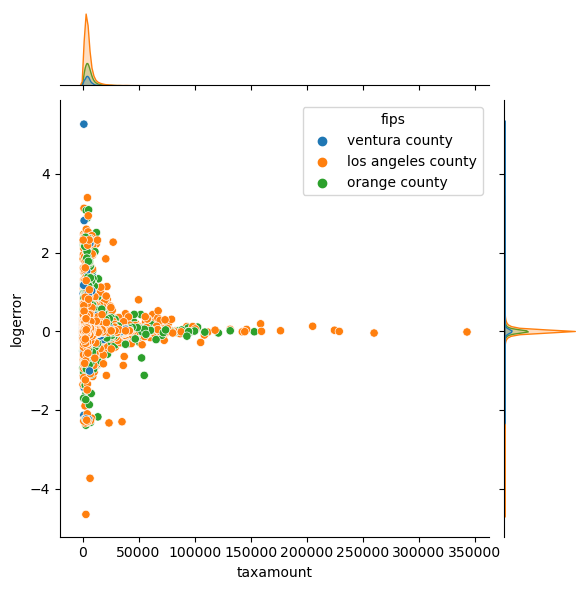

In [84]:
print("Is there a relationship between logerror and tax amount?")
sns.jointplot(x=df.taxamount, y=df.logerror, data=df, hue=df.fips)
plt.xlabel("tax amount")
plt.ylabel("logerror")
plt.show()

### Pearson R

We can use the pearson r test to compare two continuous variables and see if they are linearly correlated, and the strength of the correlation.

H$_0$ = There is no correlation between taxamount and logerror in the population; ρ = 0

In [91]:
null_2 = 'there is no correlation between taxamount and logerror in the population'
zero = 0

x = df.taxamount
y = df.logerror

r, p = stats.pearsonr(x,y)
print('r = ', r)
print('p = ', p)
print(f'p is {p:.10f}')

r =  -0.003080599782483588
p =  0.47422615095510895
p is 0.4742261510


### Takeaway

There is no linear relationship between taxamount and logerror.

However, there may be other types of relationships, such as a quadratic or absolute value relationship.

Is there a relationship between bedroomcnt and logerror?


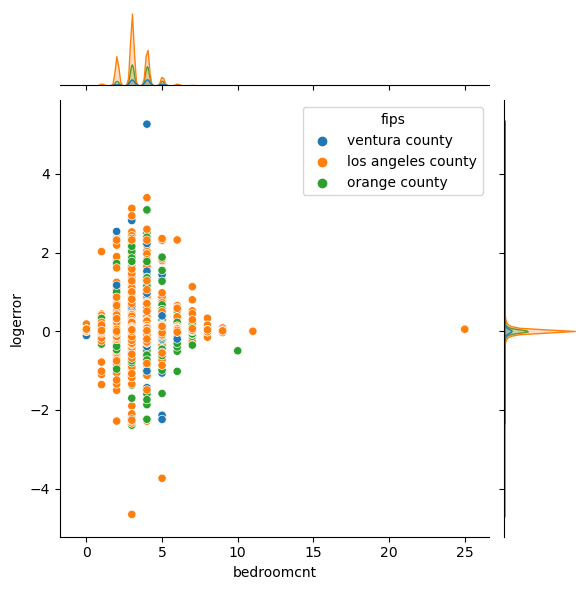

In [93]:
print('Is there a relationship between bedroomcnt and logerror?')

sns.jointplot(x=df.bedroomcnt, y=df.logerror, data=df, hue=df.fips)
plt.xlabel("tax amount")
plt.ylabel("logerror")
plt.show()

In [97]:
r_sleep_coffee, _ = stats.pearsonr(df.bedroomcnt, df.logerror)
r_sleep_score, _ = stats.pearsonr(df.taxamount, df.logerror)

print('Correlation between logerror and bedroomcnt')
print(f'  r = {r_sleep_coffee:.3f}')
print('Correlation between logerror and taxamount')
print(f'  r = {r_sleep_score:.3f}')


Correlation between logerror and bedroomcnt
  r = 0.006
Correlation between logerror and taxamount
  r = -0.003


In [92]:
null_3 = 'there is no relationship between logerror and bedroomcnt'

x = df.bedroomcnt
y = df.logerror

r, p = stats.pearsonr(x,y)
print('r = ', r)
print('p = ', p)
print(f'p is {p:.10f}')

r =  0.005611952677553536
p =  0.19235044450916308
p is 0.1923504445
